In [117]:
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import LabelEncoder

1. Построить сеть, которая состоит из последовательности двух слоев Dense, которые являются полносвязными нейронными слоями. Второй  слой — это 3-переменный слой потерь, возвращающий массив с 3 оценками вероятностей (в сумме дающих 1). Каждая оценка определяет вероятность принадлежности текущего изображения к одному из 3 классов. Обучения происходит со следующими параметрами fit: количество эпох – 10, размер входных данных – 10, размер тестовых данных – 30% 

In [3]:
import keras.datasets.mnist as mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [56]:
train_images = train_images/255.0
test_images = test_images/255.0

In [57]:
def get_index(labels, idxs):
    label_idxs, y = [], []
    for i in range(len(labels)):
        if labels[i] in idxs:
            label_idxs.append(i)
            y.append(labels[i])
    return label_idxs, y

In [111]:
correct_train_labels, y_train = get_index(train_labels, idxs=[0, 1, 2])
correct_test_labels, y_test = get_index(test_labels, idxs=[0, 1, 2])

In [112]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [92]:
def get_values(images, correct_labels):
    x = []
    for i in range(len(images)):
        if i in correct_labels:
            x.append(images[i].reshape(-1).tolist())
    return x

In [93]:
X_train = get_values(train_images, correct_train_labels)
X_test = get_values(test_images, correct_test_labels)

In [103]:
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

In [116]:
model = Sequential()
model.add(Dense(50, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
    
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
task1 = model.fit(X_train, y_train, verbose=1, epochs=10, batch_size=25, validation_data=(X_test, y_test))

Epoch 1/10
745/745 [==============================] - 2s 2ms/step - loss: 0.0605 - accuracy: 0.9815 - val_loss: 0.0224 - val_accuracy: 0.9930
Epoch 2/10
745/745 [==============================] - 2s 2ms/step - loss: 0.0259 - accuracy: 0.9922 - val_loss: 0.0209 - val_accuracy: 0.9930
Epoch 3/10
745/745 [==============================] - 2s 2ms/step - loss: 0.0162 - accuracy: 0.9959 - val_loss: 0.0206 - val_accuracy: 0.9924
Epoch 4/10
745/745 [==============================] - 2s 2ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0208 - val_accuracy: 0.9936
Epoch 5/10
745/745 [==============================] - 2s 2ms/step - loss: 0.0099 - accuracy: 0.9973 - val_loss: 0.0169 - val_accuracy: 0.9943
Epoch 6/10
745/745 [==============================] - 2s 2ms/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.0153 - val_accuracy: 0.9943
Epoch 7/10
745/745 [==============================] - 2s 2ms/step - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0.0180 - val_accuracy: 0.9949
Epoch 

2. Найти или создать любой датасет под задачу бинарной классификации и провести обучение модели с объяснением выбора функции потерь, оптимизатора и метрик для мониторинга на этапах обучения

In [118]:
dataframe = pd.read_csv('sonar.csv', header=None)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [172]:
dataset = dataframe.values
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [173]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [153]:
model = Sequential()
model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])
task2 = model.fit(X, encoded_Y, batch_size=15, epochs=40, verbose=1, validation_split=0.1)

Epoch 1/40
13/13 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5027 - val_loss: 0.6950 - val_accuracy: 0.0000e+00
Epoch 2/40
13/13 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5348 - val_loss: 0.6973 - val_accuracy: 0.0000e+00
Epoch 3/40
13/13 [==============================] - 0s 5ms/step - loss: 0.6910 - accuracy: 0.6257 - val_loss: 0.6952 - val_accuracy: 0.2381
Epoch 4/40
13/13 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.7754 - val_loss: 0.6985 - val_accuracy: 0.1905
Epoch 5/40
13/13 [==============================] - 0s 4ms/step - loss: 0.6835 - accuracy: 0.7540 - val_loss: 0.6993 - val_accuracy: 0.2857
Epoch 6/40
13/13 [==============================] - 0s 4ms/step - loss: 0.6758 - accuracy: 0.7594 - val_loss: 0.7135 - val_accuracy: 0.1905
Epoch 7/40
13/13 [==============================] - 0s 4ms/step - loss: 0.6636 - accuracy: 0.7380 - val_loss: 0.7257 - val_accuracy: 0.1905
Epoch 8/40


3. Найти или создать любой датасет под задачу проведения перекрестной проверки по K блокам. Вывести параметр среднеквадратичной ошибки при обучении модели.

In [174]:
def build_model():
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
    return model

In [175]:
def learning(k:int, num_val_samples:int, num_epochs:list[int])->list:
    all_scores = []
    infl = []  
    
    for i in range(k):
        print(f'\nProcessing fold №{i}')

        val_data = X[i*num_val_samples: (i+1)*num_val_samples]
        val_targets = encoded_Y[i*num_val_samples: (i+1)*num_val_samples]

        partial_train_data = np.concatenate([X[:i*num_val_samples], 
                                                 X[(i+1)*num_val_samples:]], axis=0)
        partial_train_targets = np.concatenate([encoded_Y[:i*num_val_samples], 
                                                    encoded_Y[(i+1)*num_val_samples:]], axis=0)
        model = build_model()
        task3 = model.fit(partial_train_data, partial_train_targets, 
                                    epochs=50, batch_size=20, verbose=1)
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
            
    return infl

In [176]:
k = 4
num_val_samples = len(X)//k
task_3 = learning(k, num_val_samples, num_epochs=50)


Processing fold №0
Epoch 1/50
8/8 [==============================] - 0s 4ms/step - loss: 0.2487 - mae: 0.4987
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 0.2451 - mae: 0.4950
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 0.2397 - mae: 0.4892
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 0.2310 - mae: 0.4789
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 0.2185 - mae: 0.4615
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 0.2057 - mae: 0.4367
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1987 - mae: 0.4093
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1965 - mae: 0.3910
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1962 - mae: 0.3882
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: 0.1949 - mae: 0.3871
Epoch 11/50
8/8 [==============================] - 0s 2ms/step - loss

8/8 [==============================] - 0s 4ms/step - loss: 0.1346 - mae: 0.3096
Epoch 32/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1329 - mae: 0.3047
Epoch 33/50
8/8 [==============================] - 0s 888us/step - loss: 0.1324 - mae: 0.2974
Epoch 34/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1308 - mae: 0.2946
Epoch 35/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1291 - mae: 0.2930
Epoch 36/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1277 - mae: 0.2869
Epoch 37/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1271 - mae: 0.2897
Epoch 38/50
8/8 [==============================] - 0s 3ms/step - loss: 0.1254 - mae: 0.2856
Epoch 39/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1249 - mae: 0.2824
Epoch 40/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1261 - mae: 0.2781
Epoch 41/50
8/8 [==============================] - 0s 0s/step - loss: 0.1227 - mae: 0.2803

8/8 [==============================] - 0s 2ms/step - loss: 0.1546 - mae: 0.3459
Epoch 19/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1522 - mae: 0.3446
Epoch 20/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1440 - mae: 0.3308
Epoch 21/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1423 - mae: 0.3277
Epoch 22/50
8/8 [==============================] - 0s 3ms/step - loss: 0.1381 - mae: 0.3152
Epoch 23/50
8/8 [==============================] - 0s 1ms/step - loss: 0.1314 - mae: 0.3055
Epoch 24/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1296 - mae: 0.3047
Epoch 25/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1256 - mae: 0.2952
Epoch 26/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1236 - mae: 0.2891
Epoch 27/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1222 - mae: 0.2831
Epoch 28/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1246 - mae: 0.2863


4. Аналогично 4 лабораторной работы, провести подготовку к обучению модели по распознаванию рукописного текста (букв) на основе библиотеки Extended MNIST

In [178]:
!pip install emnist

In [181]:
from emnist import list_datasets, extract_training_samples

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [201]:
images, labels = extract_training_samples('letters')
images.shape

(124800, 28, 28)

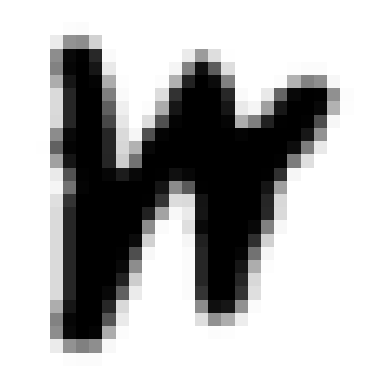

In [202]:
plt.imshow(images[0], cmap = 'binary')
plt.axis("off")
plt.show()

In [203]:
def upload_image(img):
    plt.imshow(img, cmap = 'binary')
    plt.show()
    
    size = (28, 28)
    img = np.array(img, dtype=np.uint8).reshape(-1, np.prod(size)) / 255.0
    return img

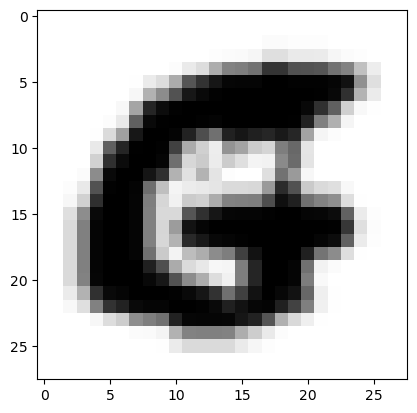

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01

In [204]:
upload_image(images[1])

In [205]:
images = images/255.0
images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.01568627, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.07843137, 0.42745098,
        0.44705882, 0.17647059, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [206]:
labels = to_categorical(labels)
labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)